In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in data
dirpath = os.path.join(os.getcwd(), "data")
expression = np.loadtxt(os.path.join(dirpath,"expression.txt"), usecols= 394)
snps = np.loadtxt(os.path.join(dirpath, "SNPs.txt"))

In [4]:
# Univariate Regression
y = expression - np.mean(expression)
beta = []
for i in range(snps.shape[1]):
    x = snps[:,i].reshape((-1,1))
    temp_beta = np.linalg.inv(x.T@x)@x.T@y  
    beta.append(temp_beta)

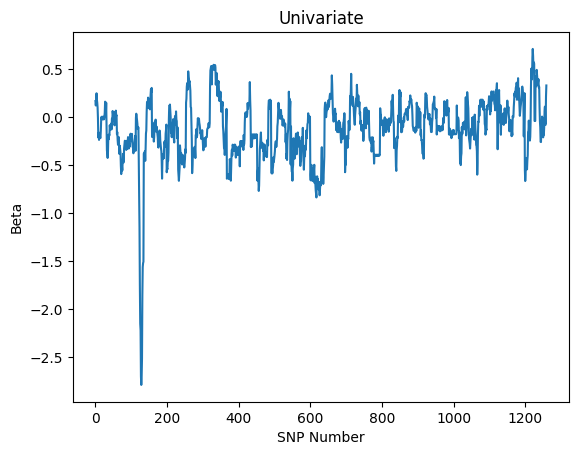

In [5]:
# Plotting Univariate Regression
fig1 = plt.figure(1)
plt.plot(beta)
plt.title("Univariate")
plt.xlabel("SNP Number")
plt.ylabel("Beta")
plt.savefig("5a_HW1.png")
plt.show()

In [6]:
# Multivariate ridge regression with prior variance = 5.0
y = expression
x = snps
sample_var = np.var(y)
prior_var = 5.0
beta = np.linalg.inv(x.T@x+sample_var/prior_var*np.identity(x.shape[1]))@x.T@y  

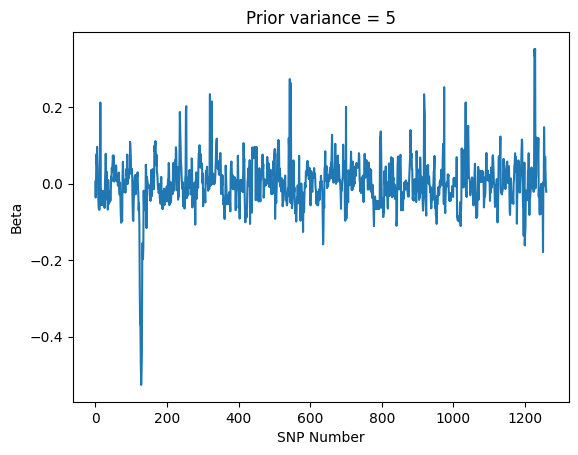

In [7]:
# Plotting multivariate ridge regression with prior variance = 5.0
fig2 = plt.figure(2)
plt.plot(beta)
plt.title("Prior variance = 5")
plt.xlabel("SNP Number")
plt.ylabel("Beta")
plt.savefig("5c1_HW1.png")

plt.show()

In [8]:
# Multivariate ridge regression with prior variance = 0.005
y = expression
x = snps
sample_var = np.var(y)
prior_var = 0.005
beta = np.linalg.inv(x.T@x+sample_var/prior_var*np.identity(x.shape[1]))@x.T@y  

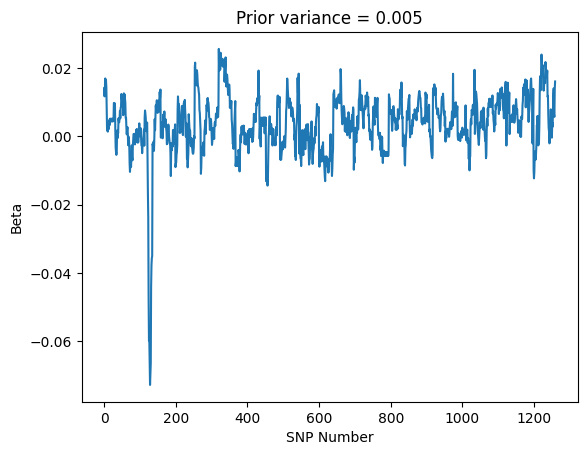

In [9]:
# Plotting multivariate ridge regression with prior variance = 0.005
fig3 = plt.figure(3)
plt.plot(beta)
plt.title("Prior variance = 0.005")
plt.xlabel("SNP Number")
plt.ylabel("Beta")
plt.savefig("5c2_HW1.png")
plt.show()

In [10]:
# Finding most impactful snp
highest_impact_snp = np.abs(beta).argmax()
print(highest_impact_snp)

128
